In [11]:
# importing the required libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

from tpot import TPOTClassifier
from sklearn.datasets import load_iris

import keras
import tensorflow as tf

2023-10-03 14:00:10.873945: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
df_iris = load_iris(return_X_y=False, as_frame=True).frame

In [9]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
X = df_iris.drop('target', axis=1)
y = df_iris['target']

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=df_iris['target'],random_state=10,test_size=0.2)

In [12]:
from keras.models import Sequential

In [13]:
from keras.layers import InputLayer, Dense

In [14]:
input_neurons = X_train.shape[1]
input_neurons

4

In [15]:
output_neurons = 1

In [16]:
number_of_hidden_layers = 2
neuron_hidden_layer_1 = 8
neuron_hidden_layer_2 = 4

In [17]:
# defining the architecture of the model
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=neuron_hidden_layer_1, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_2, activation='relu'))
model.add(Dense(units=output_neurons, activation='sigmoid'))

In [18]:
# summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 81 (324.00 Byte)
Trainable params: 81 (324.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
# compiling the model

# loss as binary_crossentropy, since we have binary classification problem
# defining the optimizer as adam
# Evaluation metric as accuracy

model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [20]:
# training the model

# passing the independent and dependent features for training set for training the model

# validation data will be evaluated at the end of each epoch

# setting the epochs as 50

# storing the trained model in model_history variable which will be used to visualize the training process

model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 78ms/step - loss: 2.2972 - accuracy: 0.3333 - val_loss: 2.0812 - val_accuracy: 0.3333
Epoch 2/100
4/4 [==============================] - 0s 12ms/step - loss: 2.0317 - accuracy: 0.3333 - val_loss: 1.8345 - val_accuracy: 0.3333
Epoch 3/100
4/4 [==============================] - 0s 11ms/step - loss: 1.7793 - accuracy: 0.3333 - val_loss: 1.5995 - val_accuracy: 0.3333
Epoch 4/100
4/4 [==============================] - 0s 23ms/step - loss: 1.5572 - accuracy: 0.3333 - val_loss: 1.3770 - val_accuracy: 0.3333
Epoch 5/100
4/4 [==============================] - 0s 16ms/step - loss: 1.3331 - accuracy: 0.3333 - val_loss: 1.1745 - val_accuracy: 0.3333
Epoch 6/100
4/4 [==============================] - 0s 12ms/step - loss: 1.1409 - accuracy: 0.3333 - val_loss: 0.9898 - val_accuracy: 0.3333
Epoch 7/100
4/4 [==============================] - 0s 14ms/step - loss: 0.9546 - accuracy: 0.3333 - val_loss: 0.8281 - val_accuracy: 0.3333
Epoch 8/100
4/4 [===

In [21]:
scores = model.evaluate(X_train, y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

4/4 [==============================] - 0s 2ms/step - loss: -2.4616 - accuracy: 0.3333

accuracy: 33.33%


In [22]:
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

1/1 [==============================] - 0s 34ms/step - loss: -2.4847 - accuracy: 0.3333

accuracy: 33.33%


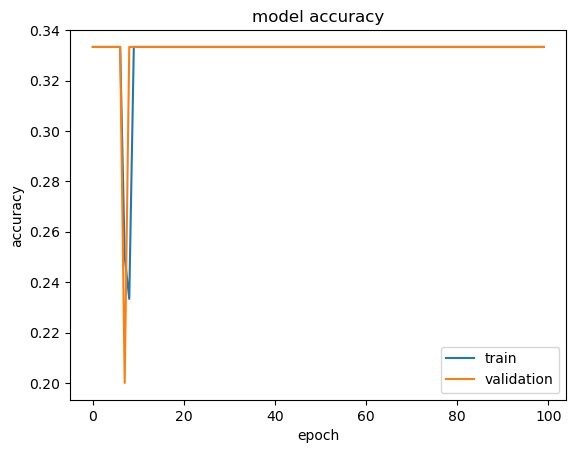

In [30]:
# summarize history for loss
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=df_iris['target'],random_state=10,train_size=0.75, test_size=0.25)

In [37]:
tpot = TPOTClassifier(generations=5, population_size=20, cv=5, random_state=42, verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9731225296442687

Generation 2 - Current best internal CV score: 0.9731225296442687

Generation 3 - Current best internal CV score: 0.9731225296442687

Generation 4 - Current best internal CV score: 0.9731225296442687

Generation 5 - Current best internal CV score: 0.9731225296442687

Best pipeline: MLPClassifier(input_matrix, alpha=0.0001, learning_rate_init=0.001)
0.9736842105263158


In [33]:
tpot.export('tpot_iris_pipeline.py')

In [38]:
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from tpot.builtins import ZeroCount

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
features = X
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, y, random_state=None)

# Average CV score on the training set was: 0.9822134387351777
exported_pipeline = make_pipeline(
    ZeroCount(),
    MLPClassifier(alpha=0.0001, learning_rate_init=0.001)
)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)


/Users/jesselang/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [39]:
# get the accuracy
print(accuracy_score(testing_target, results))

1.0
